# Practical session: NumPy and matplotlib

This notebook proposes exercices to practice the concepts explained during the chapter 2 and 3 of this lecture. There is absolutely *no machine learning* in this exercises and the goal is simply to manipulate numpy arrays, perform some computations, and graphically represent the data results.

### Import and plots settings

a. Import the two usual packages and call the magic command (starting with `%`) to have plots inline

In [1]:
# Imports
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

b. Tune the plot styles as you like using `mpl.rcParams` dictionnary (one could look at [this page](https://matplotlib.org/users/customizing.html) to know all possibilities)

In [2]:
# Plot settings
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

### Data generation

a. Using `np.random.multivariate_normal()` function (see [this page](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html)) and `reshape()` function, generate 1000000 observations of 9 3D spatial positions $r_i=(x,y,z)_i$ obtained from independant gaussian disributions with a $(\mu_i,\sigma_i)=(\mu_x, \mu_y, \mu_z, \sigma_x, \sigma_y, \sigma_z)_i$. We will consider the case of $\sigma_x=\sigma_y=\sigma_z\equiv\sigma$, with $\sigma=1.0$ for the 9 vectors, while the mean is different for the nine positions and should be centered in the 8 sommets of cube of a side length $2\times d=10$, and one in $(0,0)$.

In [3]:
# Number of observations
N=1000000

# The point here is to considere 9*3 values as a single array of 27 elements.
# First 3 =mux1,muy1,muz1, the 2nd 3=mux2,muy2,muz2, etc...
d = 5
mu1 = [0, 0, 0]
mu2 = [d, d, d]
mu3 = [-d, d, d]
mu4 = [d, -d, d]
mu5 = [d, d, -d]
mu6 = [-d, -d, d]
mu7 = [-d, d, -d]
mu8 = [d, -d, -d]
mu9 = [-d, -d, -d]
mean_nd = mu1+mu2+mu3+mu4+mu5+mu6+mu7+mu8+mu9# Not a numpy array -> '+' means concatenation
print(mean_nd)

# Uncorrelated gaussians --> sigma = Unity[29x29]
cov_nd = np.eye(27, 27)

# Call the multivariate normal PDF
data = np.random.multivariate_normal(mean=mean_nd, cov=cov_nd, size=N)

# Reshape, ie group 27 numbers into 9 x 3D vectors
data = data.reshape(N, 9, 3)

[0, 0, 0, 5, 5, 5, -5, 5, 5, 5, -5, 5, 5, 5, -5, -5, -5, 5, -5, 5, -5, 5, -5, -5, -5, -5, -5]


In [4]:
# Check that for each of the 9 positions, the means are on the right position
for i in range(0, 9):
    points = data[:,i,:]
    print('mu_{:.0f} = {}'.format(i, np.mean(points, axis=0)))

mu_0 = [-3.23990102e-04 -2.72876001e-05  8.65340632e-04]
mu_1 = [5.00108953 5.00134843 4.99883691]
mu_2 = [-5.00035407  5.00211391  4.99994299]
mu_3 = [ 4.9991773  -4.9997096   4.99915749]
mu_4 = [ 5.00052256  5.00018561 -5.00049691]
mu_5 = [-5.00152647 -4.99859143  5.00038558]
mu_6 = [-4.99882595  5.00143277 -4.99971368]
mu_7 = [ 4.99975776 -5.00017318 -5.00075098]
mu_8 = [-5.00000787 -4.99989896 -4.99778869]


b. Plot the 500 first observations in the $(x,y,z)$ space for all positions inclusively (with the same color), and then with one color for each of the 9 positions. 

In [5]:
# import the needed extension to plot in 3D
from mpl_toolkits import mplot3d

# Helper functions
def set_axis_lim(ax):
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(-10, 10)

def get_xyz(d, n=500):
    return d[:n, :, 0], d[:n, :, 1], d[:n, :, 2]

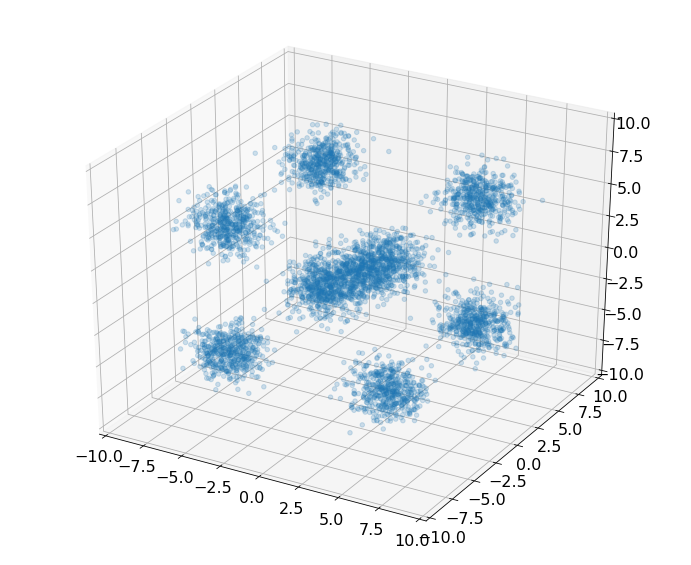

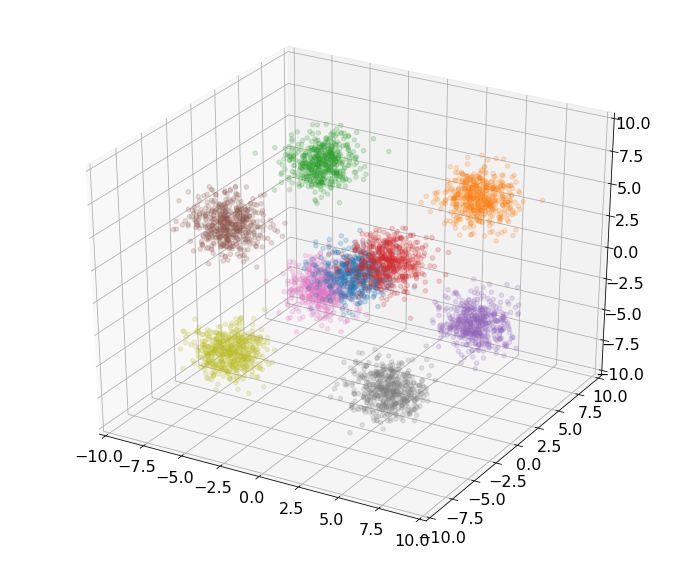

In [6]:
# Get each coordinate of all points
x, y, z = get_xyz(d=data)

# Plotting the points inclusively
fi = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
set_axis_lim(ax)
ax.scatter3D(x, y, z, alpha=0.2)

# Plotting the point with different colors
fi = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
set_axis_lim(ax)
for i in range(0, 9):
    xi, yi, zi = x[:, i], y[:, i], z[:, i]
    ax.scatter3D(xi, yi, zi, alpha=0.2);

### Counting position within a circle of radius $R$

a. Select the $r_i$ which are inside a circle centered in this origin of a radius $R=10$, and the one which are outside. Plot each $r_i$ in space for the first 500 observations (different color for whether it's inside or outside the circle).

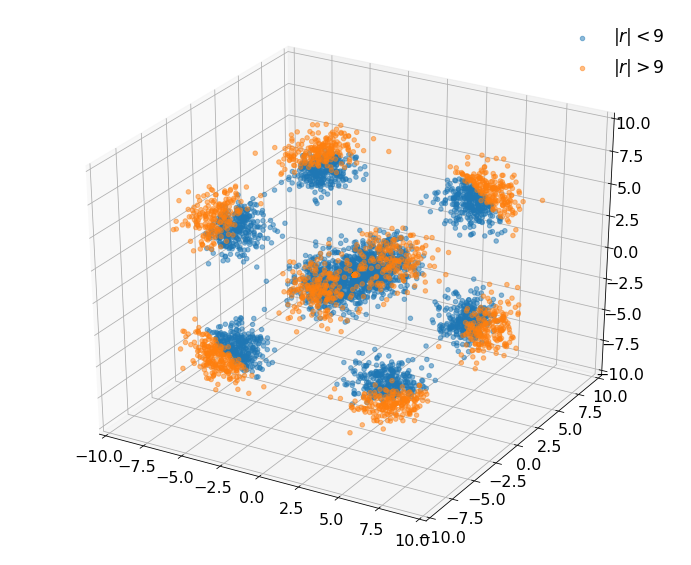

In [7]:
# Compute distance
radius = np.sqrt(np.sum(data**2, axis=2))

# Apply selection
is_inside = radius<9

# Apply selection using an empty axis for a proper broadcasting
data_inside = data*is_inside[..., None]
data_outside = data*~is_inside[..., None]

# plot the result
fi = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
set_axis_lim(ax)
x_in, y_in, z_in = get_xyz(d=data_inside)
x_out, y_out, z_out = get_xyz(d=data_outside)
ax.scatter3D(x_in, y_in, z_in, alpha=0.5, label='$|r|<9$')
ax.scatter3D(x_out, y_out, z_out, alpha=0.5, label='$|r|>9$')
ax.legend();

b. Count the number of $r_i$ per event which are in the circus, and plot the distribution of the number over the 100000 observations.

(1000000,)


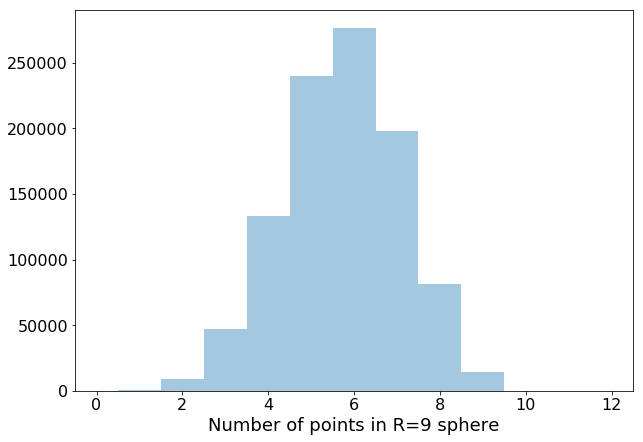

In [8]:
# Use count_nonzero function on the mask along the axis 1 (ie 27 positions)
Ninside = np.count_nonzero(is_inside, axis=1)
print(Ninside.shape)

# Plot the distribution of Ninside
plt.hist(Ninside, bins=np.linspace(-0.5, 30.5, 32), alpha=0.4)
plt.xlim(-0.5, 12.5)
plt.xlabel('Number of points in R=9 sphere');

c. Compute numerically the radius $R_{95\%}$ which contains $95\%$ of all the points.

In [9]:
# Compute efficiency of a given radius
eff_inside = np.count_nonzero(is_inside) / is_inside.size
print(eff_inside)

0.6349044444444445


In [10]:
# Loop over R
Rvals = np.linspace(0, 15, 500)
Evals = []
for R in Rvals:
    is_inside_R = radius<R
    Evals.append(np.count_nonzero(is_inside_R) / is_inside_R.size)
Evals = np.array(Evals)

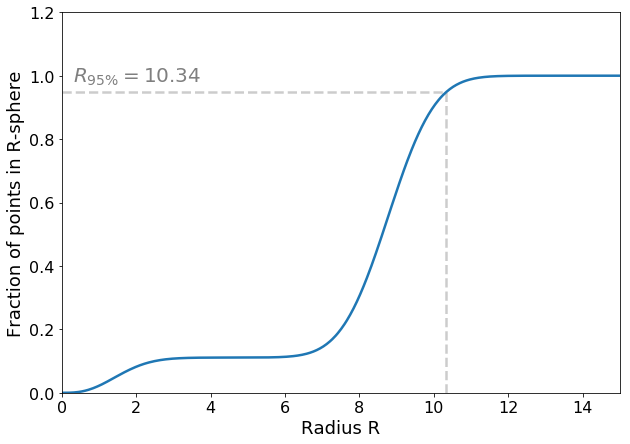

In [11]:
# Compute which R gives eff=95%
R95 = Rvals[np.argmin(np.abs(Evals-0.95))]

# Plot the result
plt.plot(Rvals, Evals)
plt.ylim(0, 1.2)
plt.xlim(0, 15)
plt.xlabel('Radius R')
plt.ylabel('Fraction of points in R-sphere')
plt.hlines(y=0.95, xmin=0, xmax=R95 , linestyle='--', alpha=0.2)
plt.vlines(x=R95 , ymin=0, ymax=0.95, linestyle='--', alpha=0.2)
plt.text(x=0.3, y=0.98, s='$R_{95\%} = $' + '{:.2f}'.format(R95), fontsize=20, alpha=0.5);